In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!apt install unzip
!unzip  "/content/gdrive/My Drive/myData.zip" -d "/content/gdrive/My Drive/Image caption/mydataset"


Streaming output truncated to the last 5000 lines.
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00086.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00087.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00088.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00089.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00090.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00091.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00092.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00093.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00094.png  
 extracting: /content/gdrive/My Drive/Image caption/mydataset/myData/5/img006-00095.png  
 extracting: /content/gdrive/My Drive/Image capti

In [0]:
folders=os.listdir("/content/gdrive/My Drive/Image caption/mydataset/myData")
len(folders)

10

In [0]:
for fol in folders:
  print(fol)

0
1
2
3
4
5
6
7
8
9


In [0]:
basepath="/content/gdrive/My Drive/Image caption/mydataset/myData"

In [0]:
x=[]
y=[]
for fol in folders:
  path=basepath+"/"+str(fol)
  for img in os.listdir(path):
    imgpath=path+"/"+img
    img=cv2.imread(imgpath)
    x.append(img)
    y.append(int(fol))
    

0


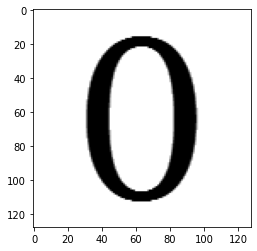

In [0]:
plt.imshow(x[100])
print(y[100])

In [0]:

from sklearn.model_selection import train_test_split


In [0]:
x=np.array(x)
y=np.array(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle='True',test_size=0.1)

In [0]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(9144, 128, 128, 3) (9144,) (1016, 128, 128, 3) (1016,)


In [0]:
def demoprepro1(img):
  img=np.array(img,dtype=np.uint8)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
  

(128, 128)


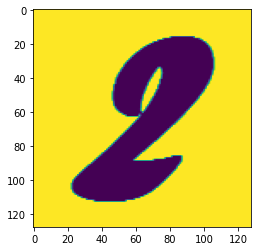

In [0]:
img=demoprepro1(xtrain[100])
plt.imshow(img)
print(img.shape)

In [0]:
def prepro(img):
  img=np.array(img,dtype=np.uint8)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(28,28))
  img=img.reshape(28,28,1)

  return img



In [0]:
xtrain=np.array(list(map(prepro,xtrain)))
xtest=np.array(list(map(prepro,xtest)))


In [0]:
xtrain[100].shape

(28, 28, 1)

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Softmax,Activation,Dropout
from keras.utils import to_categorical


In [0]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)


In [108]:
model=Sequential()


model.add(Conv2D(64,(5,5),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))


model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()





Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
activation_51 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
activation_52 (Activation)   (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 3, 3, 16)        

In [0]:
#Randomly Initializing Wights
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.2,rotation_range=10)

In [0]:
datagen.fit(xtrain)

In [112]:
history=model.fit_generator(datagen.flow(xtrain , ytrain,batch_size=128),
         shuffle=True,
         epochs = 25,
         validation_data=(xtest,ytest))

Epoch 1/25
72/72 [==============================] - 11s 152ms/step - loss: 2.6476 - accuracy: 0.1006 - val_loss: 2.2733 - val_accuracy: 0.1516
Epoch 2/25
72/72 [==============================] - 10s 145ms/step - loss: 2.4831 - accuracy: 0.1155 - val_loss: 2.2973 - val_accuracy: 0.1457
Epoch 3/25
72/72 [==============================] - 10s 145ms/step - loss: 2.3553 - accuracy: 0.1357 - val_loss: 2.0116 - val_accuracy: 0.2490
Epoch 4/25
72/72 [==============================] - 10s 144ms/step - loss: 2.1353 - accuracy: 0.1802 - val_loss: 1.7768 - val_accuracy: 0.3238
Epoch 5/25
72/72 [==============================] - 11s 146ms/step - loss: 1.9050 - accuracy: 0.2662 - val_loss: 1.3463 - val_accuracy: 0.6969
Epoch 6/25
72/72 [==============================] - 10s 143ms/step - loss: 1.4298 - accuracy: 0.4990 - val_loss: 0.7652 - val_accuracy: 0.8484
Epoch 7/25
72/72 [==============================] - 10s 141ms/step - loss: 1.0222 - accuracy: 0.6850 - val_loss: 0.3952 - val_accuracy: 0.9311

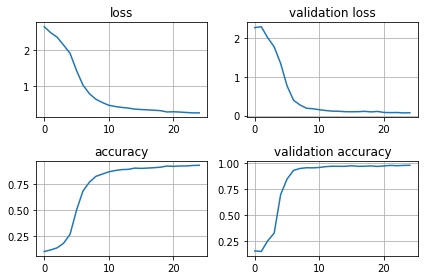

In [114]:
plt.figure()
plt.subplot(2,2,1)
plt.grid()
plt.plot(history.history['loss'])
plt.title("loss")
plt.subplot(2,2,2)
plt.grid()
plt.plot(history.history['val_loss'])
plt.title("validation loss")
plt.subplot(2,2,3)
plt.grid()
plt.plot(history.history['accuracy'])
plt.title("accuracy")
plt.subplot(2,2,4)
plt.grid()
plt.plot(history.history['val_accuracy'])
plt.title("validation accuracy")
plt.tight_layout()
plt.show()



In [0]:
model.save("gui_digits.h5")

In [0]:
import pickle

In [0]:
pickle_out=open("gui_digits.p","wb")
pickle.dump(model,pickle_out)
pickle_out.close()